# Sentiment Analysis of Movie Reviews

link to dataset: https://ai.stanford.edu/~amaas/data/sentiment/

remove the unsup folder from training dataset

In [1]:
from sklearn.datasets import load_files

reviews_train = load_files(b"DATASETS/aclImdb/train/")
text_train,y_train = reviews_train.data,reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [2]:
print("text_train[2]:\n{}".format(text_train[2]))

text_train[2]:
b'Everyone plays their part pretty well in this "little nice movie". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it\xc2\xb4d be an investment!'


In [3]:
print("text_train[8]:\n{}".format(text_train[8]))

text_train[8]:
b"The plot of this terrible film is so convoluted I've put the spoiler warning up because I'm unsure if I'm giving anything away. The audience first sees some man in Jack the Ripper garb murder an old man in an alley a hundred years ago. Then we're up to modern day and a young Australian couple is looking for a house. We're given an unbelievably long tour of this house and the husband sees a figure in an old mirror. Some 105 year old woman lived there. There are also large iron panels covering a wall in the den. An old fashioned straight-razor falls out when they're renovating and the husband keeps it. I guess he becomes possessed by the razor because he starts having weird dreams. Oh yeah, the couple is unable to have a baby because the husband is firing blanks. <br /><br />Some mold seems to be climbing up the wall after the couple removes the iron panels and the mold has the shape of a person. Late in the story there is a plot about a large cache of money & the husban

In [4]:
text_train = [doc.replace(b"<br />",b" ") for doc in text_train]

In [5]:
import numpy as np
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [6]:
print(y_train[1:100])

[0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0]


In [7]:
reviews_test = load_files("DATASETS/aclImdb/test/")
text_test ,y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />",b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


# Applying Bag-of-Words to a Toy Dataset

In [8]:
bards_words = ["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [10]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [11]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [12]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


# Bag of words for movie reviews

In [13]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [14]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ",grid.best_params_)

Best cross validation score: 0.89
Best parameters:  {'C': 0.1}


In [17]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test,y_test)))

Test score: 0.88


In [18]:
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [19]:
feature_names = vect.get_feature_names()

print("First 50 features: \n{}".format(feature_names[:50]))
print("Feature 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features: 
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Feature 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [20]:
grid = GridSearchCV(LogisticRegression(max_iter=10000),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


If the transform method of CountVectorizer is called on a document that contains words that were not contained in the training data, these words will be ignored as they are not part of the dictionary. This is usually not an issue for classification, as it's not possible to learn anything about words that are not in the training data. For some applications like spam detection, it might be helpful to add a feature that encodes how many so-called "out of vocabulary" words there are in a particular document, though. This is not implemented in sklearn but it's not that hard for you to code. You need to be sure to restrict the vocabulary in some way; otherwise,no words will be "out of vocabulary" during training.

# Stopwords

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['namely', 'you', 'up', 'which', 'i', 'when', 'of', 'under', 'less', 'has', 'thick', 'eleven', 'below', 'find', 'sixty', 'anything', 'hereupon', 'this', 'therefore', 'thereupon', 're', 'too', 'thereafter', 'us', 'inc', 'if', 'elsewhere', 'un', 'still', 'ever', 'she', 'all']


In [22]:
vect = CountVectorizer(min_df = 5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words: \n{}".format(repr(X_train)))

X_train with stop words: 
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [23]:
grid = GridSearchCV(LogisticRegression(max_iter=10000),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


# Rescaling the data with tf-idf

Instead of dropping features that are deemed unimportant, another approach is to rescale features by how informative we expect them to be. One of the most common ways to do this is using the term frequency-inverse document frequency (tf-idf) method. The intution of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus. If a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of the document.

the tf-idf score for a word w in document d as implemented in both the TfidfTransformer and TfidfVectorizer classes is given by

tfidf(w,d) = tf*log(N+1/Nw+1) + 1

N = Number of documents in the training set.
Nw = the number of documents in the training set that the word w appears in
tf = term frequency (in the query document d)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C':[0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [25]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [26]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidfvectorizer', 'logisticregression', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_

In [27]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [28]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


# Investigating Model Coefficients

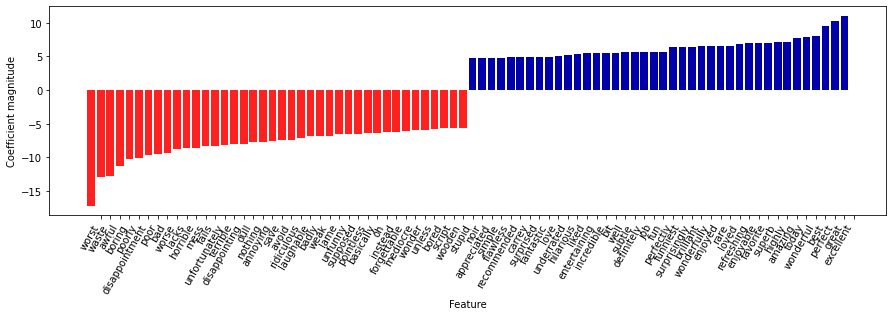

In [29]:
import mglearn
import matplotlib.pyplot as plt
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names,n_top_features=40)

# Bag-of-Words with more than one word(n-Grams)

In [30]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [31]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [32]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [33]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [34]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


Find the best n-gram for the movie review dataset using grid search.

In [35]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=10000))
param_grid={"logisticregression__C":[0.001,0.01,0.1,1,10,100],
           "tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


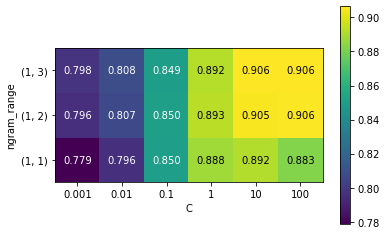

In [36]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T
heatmap = mglearn.tools.heatmap(
    scores,xlabel="C",ylabel="ngram_range",cmap="viridis",fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

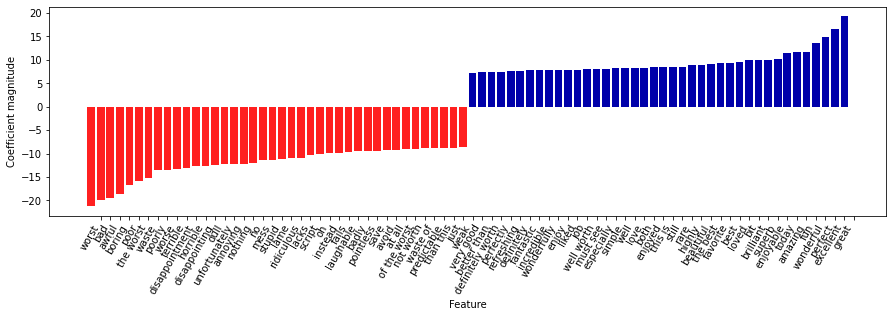

In [37]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)

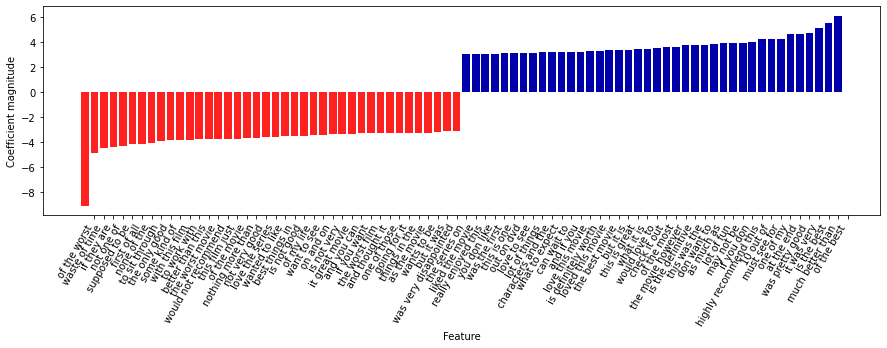

In [38]:
mask = np.array([len(feature.split(" ")) for feature in feature_names])==3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],feature_names[mask],n_top_features=40)

# Advanced Tokenization, Stemming, and Lemmatization

In [39]:
import spacy
import nltk

en_nlp =spacy.load("en_core_web_sm")
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [40]:
compare_normalization(u"Our meeting today was worse than yesterday, ""I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [41]:
# import re
# regexp = re.compile('(?u)\\b\\w\\w+\\b')
# en_nlp = spacy.load("en_core_web_sm")
# old_tokenizer = en_nlp.tokenizer
# en_nlp.tokenizer =lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))
# def custom_tokenizer(document):
#     doc_spacy = en_nlp(document)
#     return [token.lemma_ for token in doc_spacy]
# lemma_vect = CountVectorizer(tokenizer=custom_tokenizer,min_df=5)

In [42]:
#X_train_lemma = lemma_vect.fit_transform(text_train)
#print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
#vect = CountVectorizer(min_df=5).fit(text_train)
#X_train = vect.transform(text_train)
#print("X_train.shape: {}".format(X_train.shape))

# Topic Modeling and Document Clustering

It is the task of assigning each document to one or multiple topics, usually without supervision. A good example for this is news data, which might be categorized into topics like "politics", "sports","finance" and so on. Each of the components we learn then correspond to one topic, and the coefficients of the components in the representation of a document tell us how strongly related that document is to a particular topic. Often, when people talk about topic modeling, they refer to one particular decomposition method called Latent Dirichlet Allocation (LDA).

# Latent Dirichlet Allocation

Lets apply LDA to our movie review dataset to see how it works in practice. For unsupervised text document models, it is often good to remove very common words, as they might otherwise dominate the anlaysis. We'll remove the words that appear in atleast 15 percent of the documents, and we'll limit the bag-of-words model to the 10000 words that are most common after removing the top15 percent:

In [44]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)


In [46]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, learning_method="batch",max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [49]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [50]:
sorting = np.argsort(lda.components_,axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())

In [52]:
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting, topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [54]:
lda100 = LatentDirichletAllocation(n_components=100,learning_method="batch",max_iter=25,random_state=0)
document_topics100 = lda100.fit_transform(X)

In [55]:
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])
sorting=np.argsort(lda100.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [56]:
music = np.argsort(document_topics100[:,45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

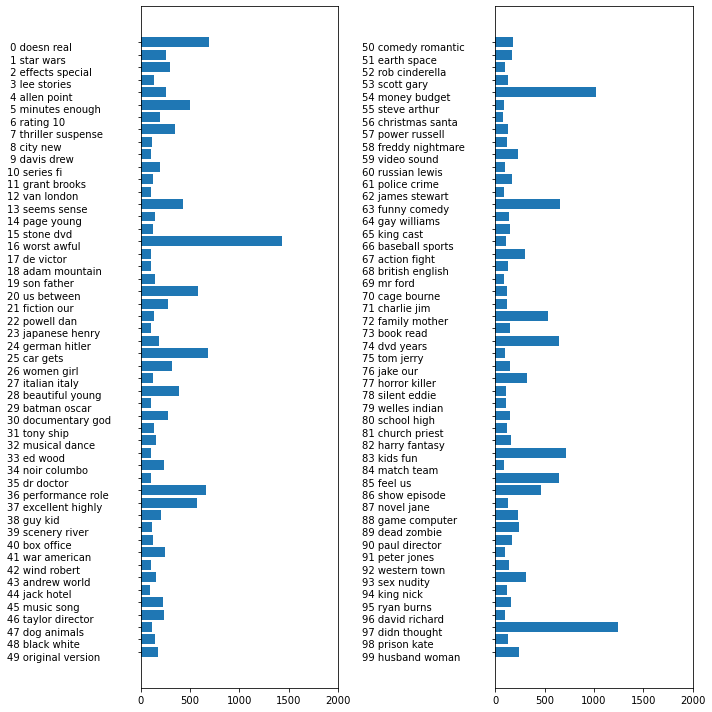

In [58]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:,:2]])]
for col in [0,1]:
    start = col*50
    end = (col+1)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],ha="left",va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()